#### Carga y Transformación de datos
##### En este notebook, cargamos los datasets históricos del precio de la acción de Mercado Libre y la cantidad de accesos a internet de la población argentina.

In [1]:
#Importación de librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
#Importamos el primer DataFrame del precio de MELI
meli_stock = pd.read_csv("datasets/Datos históricos MELI.csv")
meli_stock

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,Nov 2021,"1.629,76","1.487,47","1.705,14","1.471,77","939,60K","10,04%"
1,Oct 2021,"1.481,02","1.692,15","1.700,39","1.452,39","8,14M","-11,81%"
2,Sep 2021,"1.679,40","1.878,00","1.970,13","1.641,01","6,34M","-10,07%"
3,Ago 2021,"1.867,45","1.587,91","1.910,00","1.539,74","8,50M","19,04%"
4,Jul 2021,"1.568,70","1.554,39","1.651,80","1.471,23","5,89M","0,70%"
...,...,...,...,...,...,...,...
138,May 2010,"51,87","50,79","55,70","41,00","16,05M","2,88%"
139,Abr 2010,"50,42","48,64","54,88","46,30","12,80M","4,58%"
140,Mar 2010,"48,21","41,55","48,81","41,29","10,11M","17,19%"
141,Feb 2010,"41,14","38,51","42,40","35,50","16,67M","8,18%"


#### Transformamos los datos
Al ser todos los atributos Strings, comezamos a usar sus métodos para luego transformalos en Int o Float

In [3]:
x = meli_stock["Fecha"].str.slice(start=3)
meli_stock["Fecha"] = x

In [4]:
meli_stock["Fecha"].astype(int)
meli_stock["Último"].str.replace(".", "")

<ipython-input-4-f08c1598293c>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  meli_stock["Último"].str.replace(".", "")


0      1629,76
1      1481,02
2      1679,40
3      1867,45
4      1568,70
        ...   
138      51,87
139      50,42
140      48,21
141      41,14
142      38,03
Name: Último, Length: 143, dtype: object

In [5]:
ultimo = meli_stock["Último"]
ultimo = ultimo.str.replace(".", "",)
ultimo = ultimo.str.replace(",", ".")
ultimo = ultimo.astype(float)
meli_stock["Último"] = ultimo

<ipython-input-5-6b553726156c>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  ultimo = ultimo.str.replace(".", "",)


#### Agrupamos los precios en anuales promediando los trimestres

In [6]:
group_año = meli_stock[["Fecha", "Último"]]
a = group_año.groupby(["Fecha"]).mean().astype(float)
a

,Último
Fecha,
2010,56.436667
2011,75.585833
2012,82.390833
2013,109.808333
2014,107.531667
2015,122.861667
2016,142.660833
2017,249.880000
2018,337.995000


[[ 107.53166667]
 [ 122.86166667]
 [ 142.66083333]
 [ 249.88      ]
 [ 337.995     ]
 [ 536.52      ]
 [1000.57083333]
 [1600.32090909]]


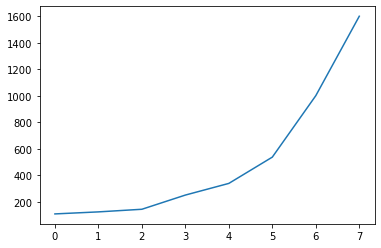

In [7]:
ult_15 = a[4:]
X = ult_15.to_numpy()
print(X)
plt.plot(X)

## Acceso a internet cada 100 habitantes
#####  •Vamos a utilizar el dataset de Penetración de internet cada 100 habitantes•

In [8]:
pen_df = pd.read_csv("datasets/Internet_Penetracion.csv")
acc = pen_df[["Año", "Accesos por cada 100 hab"]].groupby(["Año"]).mean()
y = acc.reset_index()["Accesos por cada 100 hab"].to_numpy()
acc

,Accesos por cada 100 hab
Año,
2014,15.00
2015,16.00
2016,16.50
2017,17.50
2018,18.50
2019,19.50
2020,20.25
2021,21.00


##### Realizamos ploteos teniendo en cuenta las dos variables

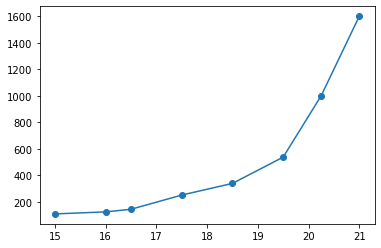

In [9]:
plt.scatter(y, X)
plt.plot(y, X)

#### Guardamos ambos arrays en un DataFrame y exportamos

In [10]:
output = pd.DataFrame(X, y)
output.to_csv("out.csv")

In [11]:
print(y)

[15.   16.   16.5  17.5  18.5  19.5  20.25 21.  ]


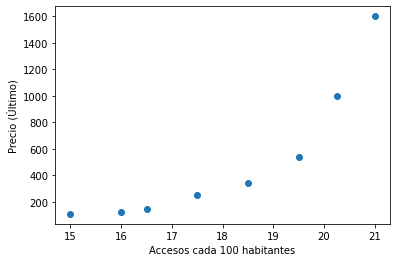

In [12]:
plt.scatter(y, X)
plt.xlabel('Accesos cada 100 habitantes')
plt.ylabel(r'Precio (Último)')
plt.savefig('scatter.png', dpi=300, bbox_inches='tight')